# Ask Your Data Questions With Your Own AI Data Scientist Using LangChain's Pandas Data Frame Agent and ChatGPT

Interact with your data via question and answer format as well as generate charts and figures with written commands.

## The Rundown:
This tutorial requires Google Colab and Python, HOWEVER:

If you don’t know Python, no worries! All of the code is already written, you just need to ask your data questions.


If you know some Python, great! You will most likely understand what is happening under the hood.


If you are a Python expert, even better! You probably understand this better than I do!


In this tutorial, we will explore how to leverage LLMs (Large Language Models) to do Exploratory Data Analysis (EDA), data visualization and interpretation by incorporating Langchain's Pandas Dataframe Agent. EDA is a critical first step in data analysis for data science, academic research and even understanding your own data, personal or business. The process involves exploring the data from multiple angles to begin to see trends that will allow the elucidation of important insights. EDA can include looking at the features (generally the columns in your dataset), maximum and minimums, correlations, building charts and graphs for easy visualization and communication and generating takeaways form your data to inform decisions and take action. Here we will explore the dataset and look at some basic EDA, visualization and statistical techniques using AI.

We will use **[OpenAI](https://platform.openai.com/) as the LLM** and **[Langchain](https://python.langchain.com/en/latest/index.html) framework** to orchestrate the prompts and the dataset located **[here](https://drive.google.com/file/d/1e1N72C9wPBZihCwazfUpXtz_0CJApdVI/view?usp=sharing)**

### Pre-requisite steps:

1. Sign up for OpenAI and get an API Key
   - Go to [platform.openai.com](https://platform.openai.com/) and sign in with an OpenAI account. You get some free tokens just for signing up so no payment necessary!
   - Click on the lock icon in the left hand tray “API keys”.
   - Click "Create New Secret Key" to generate a new API key.
   - Copy and paste the key somewhere, once you close this window you will not be able to access the key again and will have to generate a new one
2. Login to Google Drive and have a csv file ready OR feel free to download our sample file from above
3. Click on the “Open in Colab” link to open the notebook! You may need to sign in with Google.  
4. Go up to the file menu and select “save a copy in Drive” This will allow you to have a copy of your own forever!
5. Let’s get started!!!




In [ ]:
# First, we install langchain and our other dependencies/libraries.
# The -q means quiet so we will see limited output from this cell as it downloads and installs the libraries
# The -U installs the most updated version of our packages
!pip install -q -U langchain langchain_experimental langchain-openai typing-extensions cohere

In [ ]:
# Now we will import the tools we need from our libraries into the notebook

import os # A library that allows us to interact with our Operating System, we will use this for our API key
from getpass import getpass # This allows us to store our key in our notebook semi-secretly
import pandas as pd # Pandas data frame library for python, the goto for data analysis and table manipulation
import matplotlib.pyplot as plt # A great graphing library for Python
import seaborn as sns #Another great graphing library, with some extra features like easy heatmaps
from langchain_experimental.agents import create_pandas_dataframe_agent #The agent we will be using to explore our data
from langchain.agents.agent_types import AgentType #A tool that allows for chat history and multi-input tools with OpenAI Functions
from typing_extensions import Iterator # This library provides runtime support for type hints for the agent
from langchain_openai import ChatOpenAI #Our method of reaching our OpenAI model of choice

In [ ]:
# If you have your API key stored in your GDrive, you can run this cell to have your API key passed to OpenAI

from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
# If you want to paste in your GPT API key, delete the # before os.environ and run the cell

 # Setting our OpenAI API key
# os.environ['OPENAI_API_KEY'] = getpass("OpenAI Key:")


In [ ]:
# This code simply allows text outputs to wrap so they are easier to read
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
# To load the CSV file we will be exploring from your Google Drive run this cell and copy the path and paste it in the cell below where we assign it a variable
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Alternatively, download the file from the first cell, click on the file upload icon at the top left under files and paste the path below

In [ ]:
# Assigning our data to a variable to be passed into our model
df = pd.read_csv("/content/drive/MyDrive/Data/starbucks_drinkMenu_expanded.csv")

In [ ]:
# Creating our chain
agent = create_pandas_dataframe_agent(
    ChatOpenAI(temperature=0, model="gpt-4o"), # Setting up our model and how it performs (Temp-How often the model returns a low probability token, model-The model we are using)
    df,# This is our data that we defined earlier
    allow_dangerous_code=True, # This cell is commented out, this allows the experimental
    verbose=True, # This can be changed to true to see the promts the agent generats to execute the query
    agent_executor_kwargs={"handle_parsing_errors": True}, #Very important, this allows the agent to handle errors in the prompts and returns from GPT
    agent_type=AgentType.OPENAI_FUNCTIONS, # Defining that we are utilizing the OpenAI Functions agent type
)


In [ ]:
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0


In [ ]:
# Lets ask our agent about our dataset
agent.invoke('What is our dataset about?')



> Entering new AgentExecutor chain...
The dataset appears to be about various beverages, specifically focusing on their nutritional information. It includes details such as the beverage category, type of beverage, preparation method, and various nutritional values like calories, total fat, trans fat, saturated fat, sodium, total carbohydrates, cholesterol, dietary fiber, sugars, protein, vitamins, calcium, iron, and caffeine content. The dataset seems to be related to coffee and espresso drinks, as indicated by the examples in the data.

> Finished chain.


{'input': 'What is our dataset about?',
 'output': 'The dataset appears to be about various beverages, specifically focusing on their nutritional information. It includes details such as the beverage category, type of beverage, preparation method, and various nutritional values like calories, total fat, trans fat, saturated fat, sodium, total carbohydrates, cholesterol, dietary fiber, sugars, protein, vitamins, calcium, iron, and caffeine content. The dataset seems to be related to coffee and espresso drinks, as indicated by the examples in the data.'}

In [ ]:
# Lets ask our agent how to get started exploring our data
agent.invoke('How should we begin exploring this dataset?')



> Entering new AgentExecutor chain...
Exploring a dataset typically involves several steps to understand its structure, contents, and any potential issues. Here are some steps you can take to begin exploring this dataset:

1. **Understand the Structure**: 
   - Check the number of rows and columns in the dataset.
   - Examine the data types of each column to ensure they are appropriate for the data they contain.

2. **Summary Statistics**:
   - Generate summary statistics for numerical columns to understand the distribution, mean, median, min, max, etc.

3. **Missing Values**:
   - Check for any missing values in the dataset and determine how they might affect your analysis.

4. **Unique Values**:
   - Look at the unique values in categorical columns to understand the diversity of categories.

5. **Data Distribution**:
   - Visualize the distribution of key numerical variables using histograms or box plots.

6. **Relationships Between Variables**:
   - Explore relationships between v

{'input': 'How should we begin exploring this dataset?',
 'output': 'Exploring a dataset typically involves several steps to understand its structure, contents, and any potential issues. Here are some steps you can take to begin exploring this dataset:\n\n1. **Understand the Structure**: \n   - Check the number of rows and columns in the dataset.\n   - Examine the data types of each column to ensure they are appropriate for the data they contain.\n\n2. **Summary Statistics**:\n   - Generate summary statistics for numerical columns to understand the distribution, mean, median, min, max, etc.\n\n3. **Missing Values**:\n   - Check for any missing values in the dataset and determine how they might affect your analysis.\n\n4. **Unique Values**:\n   - Look at the unique values in categorical columns to understand the diversity of categories.\n\n5. **Data Distribution**:\n   - Visualize the distribution of key numerical variables using histograms or box plots.\n\n6. **Relationships Between Va

In [ ]:
# Lets start with number one
agent.invoke('Check the shape of the dataframe.')



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.shape'}`


(242, 18)The dataframe `df` has 242 rows and 18 columns.

> Finished chain.


{'input': 'Check the shape of the dataframe.',
 'output': 'The dataframe `df` has 242 rows and 18 columns.'}

In [ ]:
# Now numbe two
agent.invoke('get a summary of the dataframe, including the data types of each column and the number of non-null values.')



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.info()'}`


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Prot

{'input': 'get a summary of the dataframe, including the data types of each column and the number of non-null values.',
 'output': 'The dataframe `df` has 242 entries and 18 columns. Here is a summary of the dataframe, including the data types of each column and the number of non-null values:\n\n- `Beverage_category`: 242 non-null, object\n- `Beverage`: 242 non-null, object\n- `Beverage_prep`: 242 non-null, object\n- `Calories`: 242 non-null, int64\n- `Total Fat (g)`: 242 non-null, object\n- `Trans Fat (g)`: 242 non-null, float64\n- `Saturated Fat (g)`: 242 non-null, float64\n- `Sodium (mg)`: 242 non-null, int64\n- `Total Carbohydrates (g)`: 242 non-null, int64\n- `Cholesterol (mg)`: 242 non-null, int64\n- `Dietary Fibre (g)`: 242 non-null, int64\n- `Sugars (g)`: 242 non-null, int64\n- `Protein (g)`: 242 non-null, float64\n- `Vitamin A (% DV)`: 242 non-null, object\n- `Vitamin C (% DV)`: 242 non-null, object\n- `Calcium (% DV)`: 242 non-null, object\n- `Iron (% DV)`: 242 non-null, obje

In [ ]:
# You get the idea, lets jump to something more fun and go to number five
agent.invoke('Calculate basic statistics for numerical columns.')



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.describe()'}`


         Calories  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
count  242.000000      242.000000         242.000000    242.000000   
mean   193.871901        1.307025           0.037603      6.363636   
std    102.863303        1.640259           0.071377      8.630257   
min      0.000000        0.000000           0.000000      0.000000   
25%    120.000000        0.100000           0.000000      0.000000   
50%    185.000000        0.500000           0.000000      5.000000   
75%    260.000000        2.000000           0.100000     10.000000   
max    510.000000        9.000000           0.300000     40.000000   

        Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
count                 242.000000        242.000000          242.000000   
mean                  128.884298         35.991736            0.805785   
std                    82.303223         2

{'input': 'Calculate basic statistics for numerical columns.',
 'output': 'Here are the basic statistics for the numerical columns in the dataframe:\n\n- **Calories**\n  - Count: 242\n  - Mean: 193.87\n  - Standard Deviation: 102.86\n  - Min: 0\n  - 25%: 120\n  - 50% (Median): 185\n  - 75%: 260\n  - Max: 510\n\n- **Trans Fat (g)**\n  - Count: 242\n  - Mean: 1.31\n  - Standard Deviation: 1.64\n  - Min: 0\n  - 25%: 0.1\n  - 50% (Median): 0.5\n  - 75%: 2\n  - Max: 9\n\n- **Saturated Fat (g)**\n  - Count: 242\n  - Mean: 0.038\n  - Standard Deviation: 0.071\n  - Min: 0\n  - 25%: 0\n  - 50% (Median): 0\n  - 75%: 0.1\n  - Max: 0.3\n\n- **Sodium (mg)**\n  - Count: 242\n  - Mean: 6.36\n  - Standard Deviation: 8.63\n  - Min: 0\n  - 25%: 0\n  - 50% (Median): 5\n  - 75%: 10\n  - Max: 40\n\n- **Total Carbohydrates (g)**\n  - Count: 242\n  - Mean: 128.88\n  - Standard Deviation: 82.30\n  - Min: 0\n  - 25%: 70\n  - 50% (Median): 125\n  - 75%: 170\n  - Max: 340\n\n- **Cholesterol (mg)**\n  - Count: 24



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Calculate average calories for each beverage category\ndf_avg_calories = df.groupby('Beverage_category')['Calories'].mean().reset_index()\n\n# Plotting\nplt.figure(figsize=(10, 6))\nsns.barplot(x='Calories', y='Beverage_category', data=df_avg_calories, palette='viridis')\nplt.title('Average Calories by Beverage Category')\nplt.xlabel('Average Calories')\nplt.ylabel('Beverage Category')\nplt.show()"}`
responded: To visualize the data using plots and charts, we can use libraries like Matplotlib and Seaborn in Python. Here are some common types of visualizations that can help gain insights from the data:

1. **Bar Chart**: Useful for comparing the values of different categories. For example, you can create a bar chart to compare the average calories in different beverage categories.

2. **Histogram**: Useful for understanding the distribution of

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



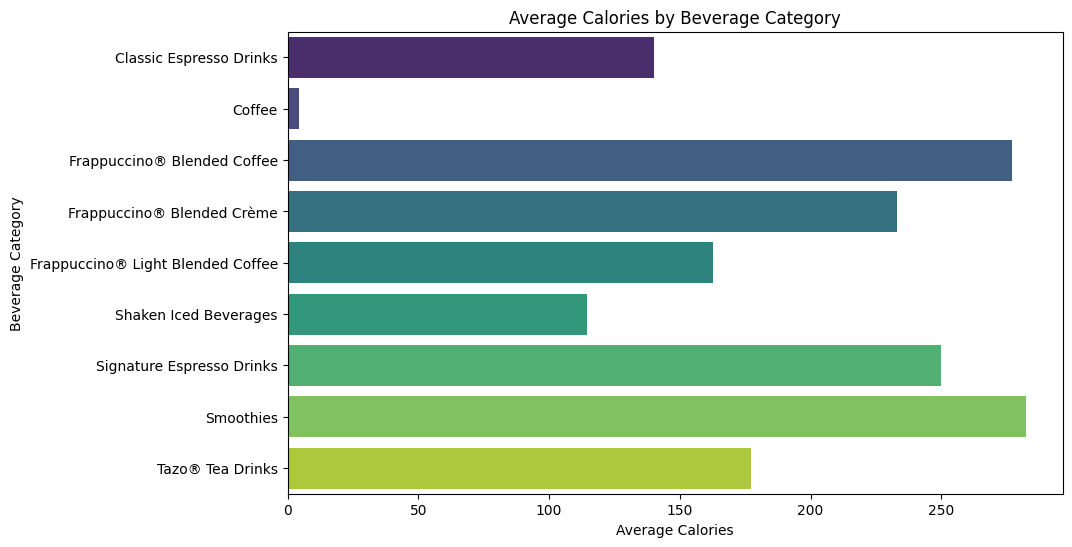

I have created a bar chart to compare the average calories in different beverage categories. This visualization helps to quickly identify which categories have higher or lower average calorie content.

Next, if you want to explore other types of visualizations, let me know which specific aspect of the data you are interested in, and I can guide you further!

> Finished chain.


{'input': 'How can we visualize the data using plots and charts to gain insights?',
 'output': 'I have created a bar chart to compare the average calories in different beverage categories. This visualization helps to quickly identify which categories have higher or lower average calorie content.\n\nNext, if you want to explore other types of visualizations, let me know which specific aspect of the data you are interested in, and I can guide you further!'}

In [ ]:
# Lets ask how to gain visual insights
agent.invoke('How can we visualize the data using plots and charts to gain insights?')



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Count the number of occurrences of each Beverage_category\ndf_category_counts = df['Beverage_category'].value_counts()\n\n# Create a bar plot\nplt.figure(figsize=(10, 6))\nsns.barplot(x=df_category_counts.index, y=df_category_counts.values, palette='viridis')\nplt.title('Number of Beverages in Each Category')\nplt.xlabel('Beverage Category')\nplt.ylabel('Count')\nplt.xticks(rotation=45, ha='right')\nplt.tight_layout()\nplt.show()"}`




<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



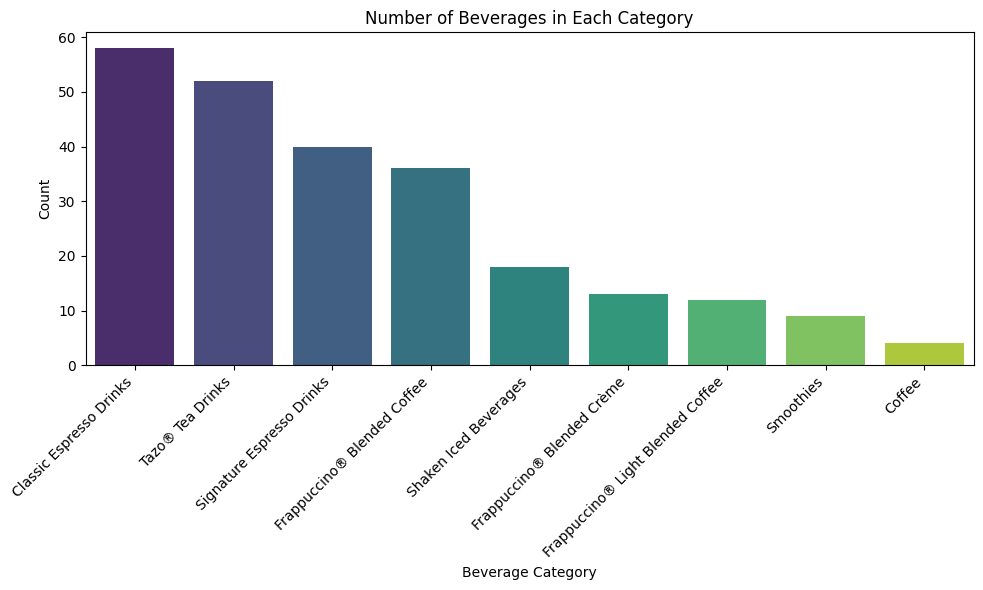

The bar chart has been created to compare the number of beverages in each category. The chart displays the count of beverages for each `Beverage_category` in the dataset.

> Finished chain.


{'input': 'Creae a bar chart to compare different categories in the dataset',
 'output': 'The bar chart has been created to compare the number of beverages in each category. The chart displays the count of beverages for each `Beverage_category` in the dataset.'}

In [ ]:
# Lets create a bar chart
agent.invoke("Creae a bar chart to compare different categories in the dataset")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Selecting only numeric columns from the dataframe\ndf_numeric = df.select_dtypes(include=['float64', 'int64'])\n\n# Creating a heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')\nplt.title('Heatmap of Numeric Data')\nplt.show()"}`




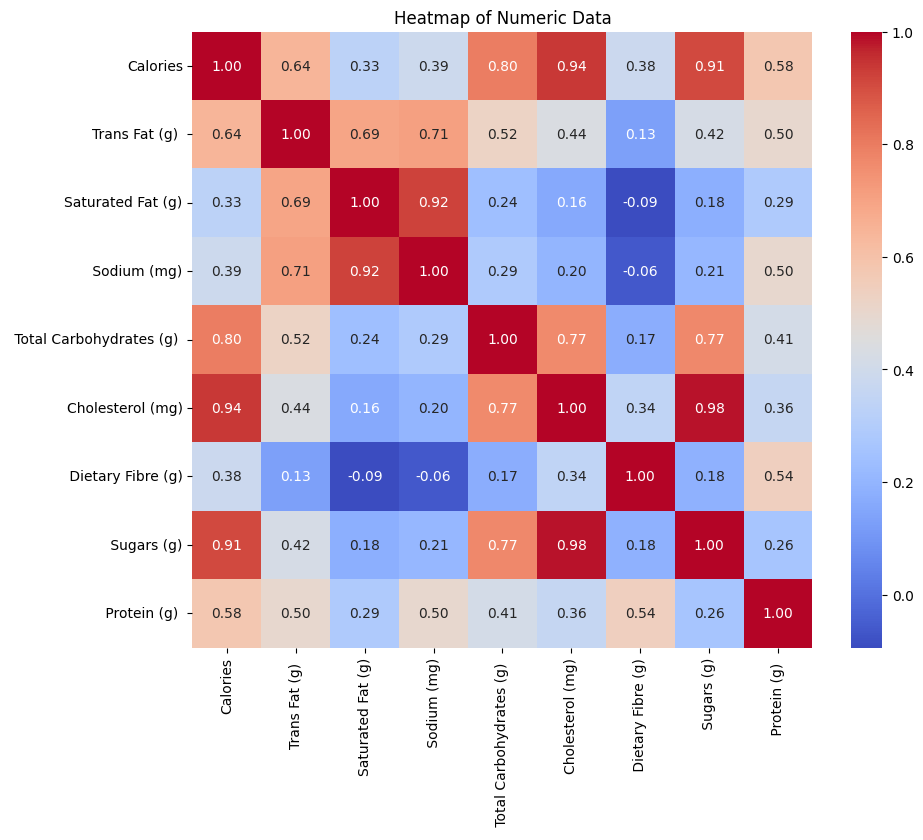

Here is the heatmap of all numeric data from the dataframe:

- The heatmap visualizes the correlation between different numeric columns.
- The color intensity indicates the strength of the correlation, with darker colors representing stronger correlations.
- The values in each cell represent the correlation coefficient between the respective pair of columns.

If you have any specific questions or need further analysis, feel free to ask!

> Finished chain.


{'input': 'show me a heatmap of all numeric data',
 'output': 'Here is the heatmap of all numeric data from the dataframe:\n\n- The heatmap visualizes the correlation between different numeric columns.\n- The color intensity indicates the strength of the correlation, with darker colors representing stronger correlations.\n- The values in each cell represent the correlation coefficient between the respective pair of columns.\n\nIf you have any specific questions or need further analysis, feel free to ask!'}

In [ ]:
# Now lets try something more complex, here we will look at a heatmap (correlation map), we cannot correlate text data
agent.invoke('show me a heatmap of all numeric data')



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Set the size of the plot\nplt.figure(figsize=(12, 6))\n\n# Create a boxplot for the distribution of calories for each beverage category\nsns.boxplot(x='Beverage_category', y='Calories', data=df)\n\n# Rotate x labels for better readability\nplt.xticks(rotation=45, ha='right')\n\n# Set the title and labels\nplt.title('Distribution of Calories for Each Beverage Category')\nplt.xlabel('Beverage Category')\nplt.ylabel('Calories')\n\n# Show the plot\nplt.tight_layout()\nplt.show()"}`




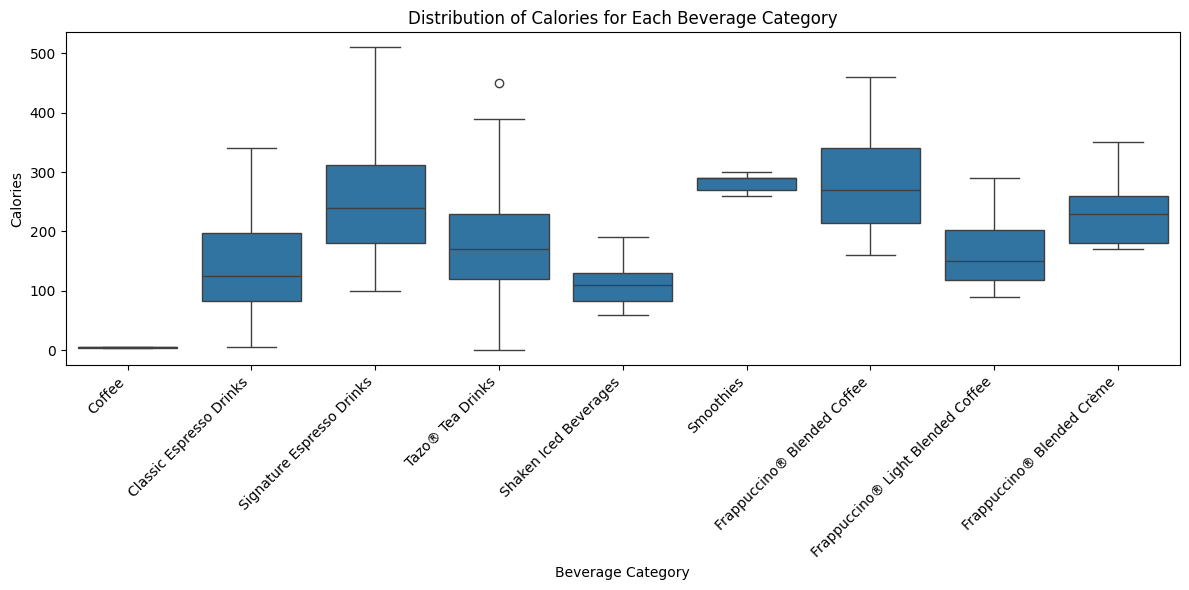

Here is a boxplot showing the distribution of calories for each beverage category. The plot provides a visual summary of the calorie distribution, including the median, quartiles, and potential outliers for each category.

> Finished chain.


{'input': 'show me a distribution of the number of calories for each category',
 'output': 'Here is a boxplot showing the distribution of calories for each beverage category. The plot provides a visual summary of the calorie distribution, including the median, quartiles, and potential outliers for each category.'}

In [ ]:
# How about some stats?
agent.invoke('show me a distribution of the number of calories for each category')

In [ ]:
# Lets try a subjective question?
agent.invoke('what is the most healthy drink in our data?')



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\n\n# Sample data\ndata = {\n    'Beverage_category': ['Coffee', 'Coffee', 'Coffee', 'Coffee', 'Classic Espresso Drinks'],\n    'Beverage': ['Brewed Coffee', 'Brewed Coffee', 'Brewed Coffee', 'Brewed Coffee', 'Caffè Latte'],\n    'Beverage_prep': ['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk'],\n    'Calories': [3, 4, 5, 5, 70],\n    'Total Fat (g)': [0.1, 0.1, 0.1, 0.1, 0.1],\n    'Trans Fat (g)': [0, 0, 0, 0, 0.1],\n    'Saturated Fat (g)': [0, 0, 0, 0, 0],\n    'Sodium (mg)': [0, 0, 0, 0, 5],\n    'Total Carbohydrates (g)': [5, 10, 10, 10, 75],\n    'Cholesterol (mg)': [0, 0, 0, 0, 10],\n    'Dietary Fibre (g)': [0, 0, 0, 0, 0],\n    'Sugars (g)': [0, 0, 0, 0, 9],\n    'Protein (g)': [0.3, 0.5, 1, 1, 6],\n    'Vitamin A (% DV)': ['0%', '0%', '0%', '0%', '10%'],\n    'Vitamin C (% DV)': ['0%', '0%', '0%', '0%', '0%'],\n    'Calcium (% DV)': ['0%', '0%', '0%', '2%', '20%'

{'input': 'what is the most healthy drink in our data?',
 'output': 'The most healthy drink in the data, based on the calculated health score, is "Brewed Coffee."'}

Great work! Now feel free to try your own questions about the data!!! To open a new cell you can click insert>code cell and follow the examples above. You can copy and paste the code, paste it into a new cell and change what is in the quotes. Happy exploring!!!

In [ ]:
# Lets try a subjective question?
agent.invoke('')



> Entering new AgentExecutor chain...
Hello! How can I assist you with your pandas dataframe today?

> Finished chain.


{'input': '',
 'output': 'Hello! How can I assist you with your pandas dataframe today?'}